In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [61]:
train = pd.read_csv('https://raw.githubusercontent.com/dansek-dj/AnalyticsVidya/main/BigMart_Sales_Pred/train_v9rqX0R.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dansek-dj/AnalyticsVidya/main/BigMart_Sales_Pred/test_AbJTz2l.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


outliers?
Duplicates?
Missing values?

In [62]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [63]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [64]:
train.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
features = list(train)
features

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [66]:
print(f'{train[features].nunique()} out of 8523')

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64 out of 8523


In [67]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [68]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [69]:
train.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [70]:
train['Item_Fat_Content'].replace()

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [71]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [72]:
data.groupby(['Item_Identifier', 'Item_Type']).Item_Weight.mean().to_frame()
data['Item_Weight'] = data.groupby(['Item_Identifier', 'Item_Type']).Item_Weight.transform(lambda x: x.fillna(x.mean()))
data['Item_Fat_Content'].replace({'LF' :'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace = True)
data['Outlet_Age'] = 2022 - data['Outlet_Establishment_Year']
data.groupby(['Outlet_Type']).Outlet_Size.agg(pd.Series.mode)
data['Outlet_Size'] = data.groupby(['Outlet_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))
data['Item_Identifier'].str[0:2].value_counts()
data['Item_Identifer_code'] = data['Item_Identifier'].str[0:2]
data_numbers = data.select_dtypes(include=np.number).drop(columns='Outlet_Establishment_Year')
scale = StandardScaler()
scaled = scale.fit_transform(data_numbers.drop(columns="Item_Outlet_Sales"))
data_numbers = pd.DataFrame(scaled, columns=data_numbers.drop(columns="Item_Outlet_Sales").columns)

In [73]:
data_numbers.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.751014,-0.969852,1.752511,-0.139681
1,-1.477653,-0.907063,-1.493696,-1.334228
2,1.011839,-0.956000,0.009874,-0.139681
3,1.377308,-1.281712,0.661838,-0.020226
4,-0.830557,-1.281712,-1.403623,1.293777


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  Outlet_Age                 14204 non-null  int6

In [75]:
data_category = data.select_dtypes(exclude=np.number)
data_category_one_hot = pd.get_dummies(data_category.drop(columns=['source','Item_Identifier']))

In [76]:
data_category_one_hot = pd.get_dummies(data_category.drop(columns=['source','Item_Identifier']))

In [77]:
data_category_one_hot.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [79]:
data_numbers = data_numbers.reset_index(drop=True)
data_category_one_hot = data_category_one_hot.reset_index(drop=True )
data = data.reset_index(drop =True)

In [80]:
data_preprocessed = pd.concat([data_numbers, data_category_one_hot, data[['Item_Identifier','Outlet_Identifier','source','Item_Outlet_Sales']]], axis = 1)

In [81]:
data_numbers.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.751014,-0.969852,1.752511,-0.139681
1,-1.477653,-0.907063,-1.493696,-1.334228
2,1.011839,-0.956000,0.009874,-0.139681
3,1.377308,-1.281712,0.661838,-0.020226
4,-0.830557,-1.281712,-1.403623,1.293777


In [82]:
data_category_one_hot.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [83]:
list(data_category_one_hot)

['Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods',
 'Outlet_Identifier_OUT010',
 'Outlet_Identifier_OUT013',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT019',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT035',
 'Outlet_Identifier_OUT045',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT049',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket

In [84]:
data[['Item_Identifier','Outlet_Identifier','source','Item_Outlet_Sales']]

,Item_Identifier,Outlet_Identifier,source,Item_Outlet_Sales
0,FDA15,OUT049,train,3735.1380
1,DRC01,OUT018,train,443.4228
2,FDN15,OUT049,train,2097.2700
3,FDX07,OUT010,train,732.3800
4,NCD19,OUT013,train,994.7052
...,...,...,...,...
14199,FDB58,OUT046,test,NaN
14200,FDD47,OUT018,test,NaN
14201,NCO17,OUT045,test,NaN
14202,FDJ26,OUT017,test,NaN


In [85]:
train_preprocessed = data_preprocessed[data_preprocessed['source']=='train'].drop(columns='source')
test_preprocessed = data_preprocessed[data_preprocessed['source']=='test'].drop(columns=['source', 'Item_Outlet_Sales'])

In [86]:
train_preprocessed.to_csv("train_preprocessed.csv", index = False)
test_preprocessed.to_csv("test_preprocessed.csv", index = False)

In [87]:
train_preprocessed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,-0.751014,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDA15,OUT049,3735.1380
1,-1.477653,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,1,0,0,DRC01,OUT018,443.4228
2,1.011839,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDN15,OUT049,2097.2700
3,1.377308,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,1,0,0,0,0,1,0,FDX07,OUT010,732.3800
4,-0.830557,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,1,0,0,0,0,1,NCD19,OUT013,994.7052


In [88]:
from sklearn.linear_model import LinearRegression
X = train.drop(columns = ["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier"])
y = train['Item_Outlet_Sales']

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

In [92]:
train = pd.read_csv("train_preprocessed.csv")
test = pd.read_csv("test_preprocessed.csv")
sample = pd.read_csv("sample_submission_8RXa3c6.csv")

In [93]:
X = train.drop(columns = ["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier"])
y = train['Item_Outlet_Sales']

In [94]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifer_code_DR,Item_Identifer_code_FD,Item_Identifer_code_NC,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,-0.751014,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDA15,OUT049,3735.1380
1,-1.477653,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,1,0,0,DRC01,OUT018,443.4228
2,1.011839,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,FDN15,OUT049,2097.2700
3,1.377308,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,1,0,0,0,0,1,0,FDX07,OUT010,732.3800
4,-0.830557,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,1,0,0,0,0,1,NCD19,OUT013,994.7052


In [96]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state=32)

In [102]:
model = LinearRegression()
model

LinearRegression()

In [103]:
model.fit(train_X, train_y)

LinearRegression()

In [106]:
model.coef_

array([ 5.75271882e+00, -1.17478780e+01,  9.78067547e+02,  5.38968258e+15,
       -1.00924145e+15, -1.00924145e+15, -1.56883637e+15, -1.56883637e+15,
       -1.56883637e+15, -1.56883637e+15, -1.56883637e+15, -1.56883637e+15,
       -1.56883637e+15, -1.56883637e+15,  1.84973632e+15,  1.84973632e+15,
       -1.56883637e+15,  1.84973632e+15, -1.56883637e+15, -1.56883637e+15,
       -1.56883637e+15, -1.56883637e+15, -3.32812354e+15,  1.49581237e+16,
        3.59652052e+15,  8.11521265e+15, -1.18795060e+16, -7.53852025e+15,
        1.66505060e+15,  3.77403991e+14,  1.81996424e+16,  7.96241744e+15,
       -1.30516841e+15,  1.32347380e+16,  1.70986643e+15, -9.15967038e+15,
        1.18816846e+16, -9.34134989e+15,  1.17916419e+16, -1.05616268e+16,
       -4.09450949e+15, -3.89253594e+15, -1.13302356e+14, -1.13302356e+14,
       -3.53187505e+15])

In [107]:
model.intercept_

1968356468337488.8

In [108]:
train_X_pred = model.predict(train_X)
test_X_pred = model.predict(test_X)

#actual test data from hackathon
test_pred = model.predict(test.drop(columns = ["Item_Identifier", "Outlet_Identifier"]))


In [109]:
train_X_RMSE = np.sqrt(mean_squared_error(train_y, train_X_pred))
test_X_RMSE = np.sqrt(mean_squared_error(test_y, test_X_pred))

In [110]:
train_X_RMSE

1125.6867963404097

In [111]:
test_X_RMSE

1139.0001443395981

In [112]:
print("Train RMSE : ",train_X_RMSE)
print("Test RMSE : ",test_X_RMSE)

Train RMSE :  1125.6867963404097
Test RMSE :  1139.0001443395981


In [113]:
train_X_R2 = r2_score(train_y, train_X_pred)
test_X_R2 = r2_score(test_y, test_X_pred)


In [114]:
print("Train R2 : ",train_X_R2)
print("Test R2 : ",test_X_R2)


Train R2 :  0.5640403225081423
Test R2 :  0.5574787219589975


In [115]:
test_pred_modified = np.where(test_pred<0,0,test_pred)


In [118]:
test['Item_Outlet_Sales'] = test_pred_modified

In [119]:
Output = test[[ "Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]]


In [120]:
Output.to_csv("Result_Linear_Regression_with_80percent_traindata_abs.csv", index = False)


In [121]:
Output.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1915.50
1,FDW14,OUT017,1415.50
2,NCN55,OUT010,1914.75
3,FDQ58,OUT017,2659.50
4,FDY38,OUT027,5020.50


In [ ]:
5.75271882e+00*x1-1.17478780e+01*x2+9.78067547e+02*x3+5.38968258e+15*x4-1.00924145e+15*x5-1.00924145e+15*x6-1.56883637e+15*x7-1.56883637e+15*x8     -1.56883637e+15, -1.56883637e+15, -1.56883637e+15, -1.56883637e+15,
-1.56883637e+15*x9-1.56883637e+15*x10,  1.84973632e+15,  1.84973632e+15,
       -1.56883637e+15,  1.84973632e+15, -1.56883637e+15, -1.56883637e+15,
       -1.56883637e+15, -1.56883637e+15, -3.32812354e+15,  1.49581237e+16,
        3.59652052e+15,  8.11521265e+15, -1.18795060e+16, -7.53852025e+15,
        1.66505060e+15,  3.77403991e+14,  1.81996424e+16,  7.96241744e+15,
       -1.30516841e+15,  1.32347380e+16,  1.70986643e+15, -9.15967038e+15,
        1.18816846e+16, -9.34134989e+15,  1.17916419e+16, -1.05616268e+16,
       -4.09450949e+15, -3.89253594e+15, -1.13302356e+14, -1.13302356e+14,
       -3.53187505e+15

In [122]:
def model_predict(model, train_X,train_y,test,filename):

    train_pred = model.predict(train_X)
    test_pred = model.predict(test.drop(columns = ["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]))
    train_RMSE = np.sqrt(mean_squared_error(train_y, train_pred))
    print("Train RMSE : ",train_RMSE)
    train_R2 = r2_score(train_y, train_pred)
    print("Train R2 : ",train_R2)
    test_pred_modified = np.where(test_pred<0,0,test_pred)
    test['Item_Outlet_Sales'] = test_pred_modified
    Output = test[[ "Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]]
    Output.to_csv(filename, index = False)


In [123]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [124]:
model_predict(model, X,y,test,"Result_LR_fulltrain_model.csv")

Train RMSE :  1127.0790500380854
Train R2 :  0.563738062833727


In [126]:
from sklearn.neighbors import KNeighborsRegressor

In [131]:
model = KNeighborsRegressor(n_neighbors = 18)
model.fit(X, y)

KNeighborsRegressor(n_neighbors=18)

In [132]:
def model_predict(model, train_X,train_y,test,filename):

    train_pred = model.predict(train_X)
    test_pred = model.predict(test.drop(columns = ["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]))
    train_RMSE = np.sqrt(mean_squared_error(train_y, train_pred))
    print("Train RMSE : ",train_RMSE)
    train_R2 = r2_score(train_y, train_pred)
    print("Train R2 : ",train_R2)
    test_pred_modified = np.where(test_pred<0,0,test_pred)
    test['Item_Outlet_Sales'] = test_pred_modified
    Output = test[[ "Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]]
    Output.to_csv(filename, index = False)


In [135]:
model_predict(model, X,y,test,"Result_LR_fulltrain_modelKNN18.csv")

Train RMSE :  1107.4218988179707
Train R2 :  0.5788228675052731


100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:43<00:00,  1.14it/s]


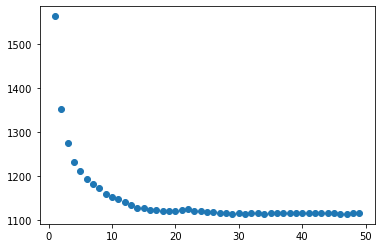

In [134]:
from tqdm import tqdm
res_rmse = []
for i in tqdm(range(1,50)):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(train_X, train_y)
    test_pred = model.predict(test_X)
    test_X_RMSE = np.sqrt(mean_squared_error(test_y, test_pred))
    res_rmse.append(test_X_RMSE)
plt.scatter(range(1,50),res_rmse)